In [4]:
from src.votekit.ballot_generator import name_BradleyTerry 
from src.votekit.pref_interval import PreferenceInterval
import matplotlib.pyplot as plt

In [2]:
!pwd

/home/willithg/MGGG/VoteKit/tests/ballot_generators


In [3]:
%cd ../..

/home/willithg/MGGG/VoteKit


In [12]:
## setup the classes
#n_cands = 5
#cands = [chr(ord('a')+i) for i in range(n_cands)] # TODO: need a better way of generating cands which allow us to go larger than 26
#print("candidates: ", cands)

cands = ["W1", "W2", "C1", "C2"]
bt = name_BradleyTerry(
    candidates=cands,
        pref_intervals_by_bloc={
            "W": {
                "W": PreferenceInterval({"W1": 0.6, "W2": 0.3}),
                "C": PreferenceInterval({"C1": 0.05, "C2": 0.05}),
            },
            "C": {
                "W": PreferenceInterval({"W1": 0.2, "W2": 0.2}),
                "C": PreferenceInterval({"C1": 0.3, "C2": 0.3}),
            },
        },
        bloc_voter_prop={"W": 0.5, "C": 0.5 },
        cohesion_parameters={"W": {"W": 0.5, "C": 0.5}, "C": {"C": 0.5, "W": 0.5}},
    )

'''
pref_intervals_by_bloc={
            "W": {
                "W": PreferenceInterval({"W1": 0.4, "W2": 0.3}),
                "C": PreferenceInterval({"C1": 0.2, "C2": 0.1}),
            },
            "C": {
                "W": PreferenceInterval({"W1": 0.2, "W2": 0.2}),
                "C": PreferenceInterval({"C1": 0.3, "C2": 0.3}),
            },
        },
        #bloc_voter_prop={"W": 0.7, "C": 0.3},
    '''
8

8

In [13]:
# run BT both ways and then process the differences
num_ballots = 10000#int(10e5)
bals_BT_classic = bt.generate_profile(num_ballots)
#bals_BT_MCMC = bt.generate_profile_MCMC(num_ballots, verbose=False)
bals_BT_MCMC = bt.generate_profile_MCMC(num_ballots, verbose=False, on_shortcut_graph=False)
bals_BT_MCMC_shortcut = bt.generate_profile_MCMC(num_ballots, verbose=False, on_shortcut_graph=True)


ballots_per_block={'W': 5000, 'C': 5000}
ballots_per_block={'W': 5000, 'C': 5000}


### Visualize the frequency differences between MCMC and classic BT method

False
{'W1W2C2C1': 170, 'W1W2C1C2': 223, 'W1C2C1W2': 196, 'W1C2W2C1': 229, 'W1C1C2W2': 228, 'W1C1W2C2': 210, 'W2C2C1W1': 213, 'W2C2W1C1': 235, 'W2C1C2W1': 192, 'W2C1W1C2': 204, 'W2W1C2C1': 236, 'W2W1C1C2': 196, 'C1W2C2W1': 223, 'C1W2W1C2': 193, 'C1C2W1W2': 211, 'C1C2W2W1': 205, 'C1W1C2W2': 210, 'C1W1W2C2': 201, 'C2W2C1W1': 193, 'C2W2W1C1': 224, 'C2C1W1W2': 207, 'C2C1W2W1': 201, 'C2W1C1W2': 204, 'C2W1W2C1': 196}
['W1', 'W2', 'C1', 'C2']


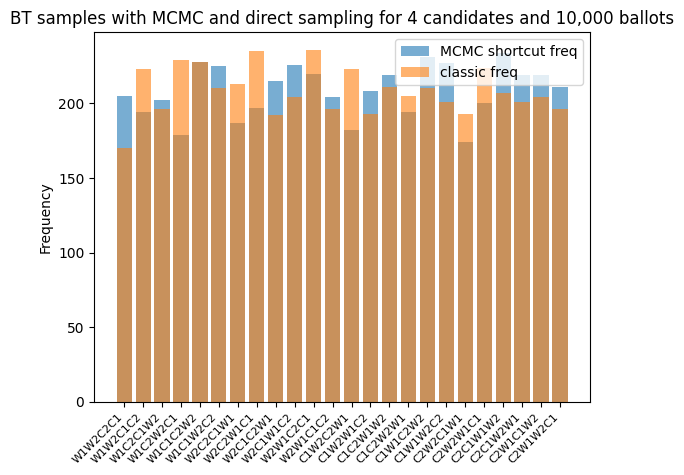

In [16]:
ballot_rankings_MCMC = [bal.ranking for bal in bals_BT_MCMC.ballots]
bal_labels_MCMC = ["".join([list(cand)[0] for cand in ranking]) for ranking in ballot_rankings_MCMC]
bal_weights_MCMC = [int(bal.weight) for bal in bals_BT_MCMC.ballots]

ballot_rankings_MCMC_shortcut = [bal.ranking for bal in bals_BT_MCMC_shortcut.ballots]
bal_labels_MCMC_shortcut = ["".join([list(cand)[0] for cand in ranking]) for ranking in ballot_rankings_MCMC_shortcut]
bal_weights_MCMC_shortcut = [int(bal.weight) for bal in bals_BT_MCMC_shortcut.ballots]

ballot_rankings_classic = [bal.ranking for bal in bals_BT_classic.ballots]
bal_labels_classic = ["".join([list(cand)[0] for cand in ranking]) for ranking in ballot_rankings_classic]
bal_weights_classic = [int(bal.weight) for bal in bals_BT_classic.ballots]

print(bal_labels_classic == bal_labels_MCMC) # labels not in the same order, so set up a map 

# map ballots to weights for each method
bal_rankings_map_classic = {bal_labels_classic[i]: bal_weights_classic[i] for i in range(len(ballot_rankings_classic))}
bal_rankings_map_MCMC = {bal_labels_MCMC[i]: bal_weights_MCMC[i] for i in range(len(ballot_rankings_MCMC))}
bal_rankings_map_MCMC_shortcut = {bal_labels_MCMC_shortcut[i]: bal_weights_MCMC_shortcut[i] for i in range(len(ballot_rankings_MCMC_shortcut))}

print(bal_rankings_map_classic)
x_labels = list(bal_rankings_map_classic.keys())

#plt.bar(x_labels, [bal_rankings_map_MCMC[k] for k in x_labels], label="MCMC freq")
plt.bar(x_labels, [bal_rankings_map_MCMC_shortcut[k] for k in x_labels], label="MCMC shortcut freq", alpha=0.6)
plt.bar(x_labels, [bal_rankings_map_classic[k] for k in x_labels], label="classic freq", alpha=0.6)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.legend()
plt.ylabel("Frequency")
plt.title(f"BT samples with MCMC and direct sampling for {len(cands)} candidates and {num_ballots:,} ballots")

8
print(cands)


In [42]:
bals_BT_MCMC.ballots

(Ranking
 1.) W2, 
 2.) W1, 
 3.) C1, 
 4.) C2, 
 Weight: 9802.0,
 Ranking
 1.) W2, 
 2.) W1, 
 3.) C2, 
 4.) C1, 
 Weight: 4735.0,
 Ranking
 1.) W2, 
 2.) C1, 
 3.) W1, 
 4.) C2, 
 Weight: 4965.0,
 Ranking
 1.) W2, 
 2.) C1, 
 3.) C2, 
 4.) W1, 
 Weight: 1186.0,
 Ranking
 1.) W2, 
 2.) C2, 
 3.) C1, 
 4.) W1, 
 Weight: 568.0,
 Ranking
 1.) W2, 
 2.) C2, 
 3.) W1, 
 4.) C1, 
 Weight: 1183.0,
 Ranking
 1.) C1, 
 2.) W1, 
 3.) C2, 
 4.) W2, 
 Weight: 1529.0,
 Ranking
 1.) C1, 
 2.) W1, 
 3.) W2, 
 4.) C2, 
 Weight: 4403.0,
 Ranking
 1.) C1, 
 2.) W2, 
 3.) W1, 
 4.) C2, 
 Weight: 3310.0,
 Ranking
 1.) C1, 
 2.) W2, 
 3.) C2, 
 4.) W1, 
 Weight: 842.0,
 Ranking
 1.) C1, 
 2.) C2, 
 3.) W1, 
 4.) W2, 
 Weight: 399.0,
 Ranking
 1.) C1, 
 2.) C2, 
 3.) W2, 
 4.) W1, 
 Weight: 302.0,
 Ranking
 1.) W1, 
 2.) C1, 
 3.) C2, 
 4.) W2, 
 Weight: 3011.0,
 Ranking
 1.) W1, 
 2.) C1, 
 3.) W2, 
 4.) C2, 
 Weight: 8893.0,
 Ranking
 1.) W1, 
 2.) W2, 
 3.) C1, 
 4.) C2, 
 Weight: 13142.0,
 Ranking
 1.)